<a href="https://colab.research.google.com/github/cogilv25/21010093uhi_DataAnalytics/blob/main/3%20-%20Minimal%20Model%20Generation%20For%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimal Model Generation for Testing
## Initialization
The dataset and neccessary modules are imported.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib as matplot
from matplotlib import pyplot as plot
from matplotlib import patches as patches

df = pd.read_csv("https://raw.githubusercontent.com/cogilv25/21010093uhi_DataAnalytics/refs/heads/main/2_cleaned_dataset.csv", index_col=0)

def generate_train_and_test_sets(dataframe, label_name, feature_list, split = 0.8):
  dataset = [dataframe[label_name]]
  for f in feature_list:
    dataset.append(dataframe[f])
  keys =  feature_list.copy()
  keys.insert(0, label_name)

  dataset = pd.concat(dataset, axis=1, keys=keys)

  trainset = dataset.sample(frac=split, random_state=0)
  testset = dataset.drop(trainset.index)

  return trainset, testset

# Note: It is assumed generate_train_and_test_sets was used to generate the training set input to this function.
def generate_and_train_linear_model(trainset, epochs = 100, learning_rate = 0.1, validation_split = 0.2):
  features = trainset.copy()
  labels = features.pop(features.keys()[0]) # generate_train_and_test_sets puts the label in the first column.

  normaliser = tf.keras.layers.Normalization(axis=-1)
  normaliser.adapt(np.array(features))

  model = tf.keras.Sequential([normaliser, layers.Dense(units=1)])

  model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss="mean_absolute_error")

  model.fit(features, labels, epochs=epochs, validation_split=validation_split)

  return model

# Note: It is assumed generate_train_and_test_sets was used to generate the training set input to this function.
def get_model_predictions_and_actual(model, testset):
  features = testset.copy()
  actual = features.pop(features.keys()[0]) # generate_train_and_test_sets puts the label in the first column.
  return model.predict(features).flatten(), actual

def evaluate_predicted_versus_actual(predicted, actual, nFeatures):
  error = actual - predicted
  error_squared = error ** 2
  total_variation_squared = (actual - actual.mean()) ** 2
  nObservations = actual.count()

  mae = abs(error).mean()                                                       # Mean Absolute Error
  rmse = np.sqrt(error_squared.mean())                                          # Root Mean Error Squared
  rsq = 1 - (error_squared.sum() / total_variation_squared.sum())               # R-Squared
  arsq = 1 - ((1 - rsq) * (nObservations-1)) / (nObservations - nFeatures - 1)  # Adjusted R-Squared

  return mae, rmse, rsq, arsq

def print_evaluation_statistics(mae, rmse, rsq, arsq):
  print("Mean Absolute Error:", mae)
  print("Root Mean Squared Error:", rmse)
  print("R-Squared:", rsq)
  print("Adjusted R-Squared:", arsq)

def plot_predicted_versus_actual(predicted, actual):
  plot.figure(figsize=(8,6))
  plot.scatter(actual,predicted, label="Predicted")
  plot.xlabel("Actual")
  plot.ylabel("Prediction")
  plot.title("Actual vs. Prediction")
  plot.plot([actual.min(), actual.max()],[actual.min(), actual.max()], color="red")
  legend_patch = patches.Patch(color='red', label='Prediction = Actual')
  plot.legend(handles=[legend_patch])
  plot.show()

def plot_training_versus_validation_loss(train, valid, epochs):
  epoch_axis = range(epochs)
  plot.figure(figsize=(8,6))
  plot.plot(epoch_axis, train, label="Training Loss", color="blue")
  plot.plot(epoch_axis, valid, label="Validation Loss", color="red")
  plot.title("Training Loss vs. Validation Loss")
  plot.show()

Easily modifiable variables.

In [2]:
training_test_split = 0.8
validation_split = 0.1

dnn_epochs = 250
dnn_learning_rate = 0.008

lm_epochs = 600
lm_learning_rate = 0.01

## Generate Linear Model

In [3]:
lm_trainset, lm_testset = generate_train_and_test_sets(df,"reports",["year", "temp", "min", "sndp", "wdsp", "visib", "dayOfWeek", "month", "dayOfMonth"], training_test_split)

lm = generate_and_train_linear_model(lm_trainset, lm_epochs, lm_learning_rate, validation_split)

lm_train_loss = lm.history.history['loss']
lm_valid_loss = lm.history.history['val_loss']

Epoch 1/600
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 939.1840 - val_loss: 939.7192
Epoch 2/600
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 941.5621 - val_loss: 937.7552
Epoch 3/600
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 938.2433 - val_loss: 935.7822
Epoch 4/600
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 937.5086 - val_loss: 933.8162
Epoch 5/600
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 934.1527 - val_loss: 931.8486
Epoch 6/600
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 933.3851 - val_loss: 929.8733
Epoch 7/600
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 938.2723 - val_loss: 927.9106
Epoch 8/600
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 936.1302 - val_loss: 925.9467
Epoch 9/600
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 923.8588 - val_loss: 923.9774
Epoch 10/600
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 920.5466 - val_loss: 922.0122
Epoch 11/600
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 924.3529 - val_loss: 920.04

## Generate Deep Neural Network Model
Normalize reports between 0 and 1 for dnn.

In [4]:
dnn_df = df.copy()
max_reports = dnn_df['reports'].max()
dnn_df['reports'] /= max_reports

Remove data within the date range 2020-2022.

In [5]:
dnn_df = dnn_df.drop(dnn_df[(dnn_df.year > 2019) & (dnn_df.year < 2023)].index)

In [14]:
dnn_trainset = dnn_df.sample(frac=training_test_split, random_state=0)
dnn_testset = dnn_df.drop(dnn_trainset.index)

features = dnn_trainset.copy()
labels = features.pop("reports")

norm = tf.keras.layers.Normalization(axis=-1)
norm.adapt(np.array(features))

dnn_layers = [norm, layers.Dense(units=15, activation=tf.keras.activations.relu), layers.Dense(units=9, activation=tf.keras.activations.relu), layers.Dense(units=5, activation=tf.keras.activations.relu), layers.Dense(units=1)]

dnn_model = tf.keras.Sequential(dnn_layers)
dnn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=dnn_learning_rate), loss=keras.losses.MAE)

dnn_model.fit(features, labels, epochs=dnn_epochs, validation_split=validation_split)

dnn_train_loss = dnn_model.history.history['loss']
dnn_valid_loss = dnn_model.history.history['val_loss']

Epoch 1/250
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1625 - val_loss: 0.0418
Epoch 2/250
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0408 - val_loss: 0.0321
Epoch 3/250
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0342 - val_loss: 0.0303
Epoch 4/250
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0327 - val_loss: 0.0305
Epoch 5/250
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0292 - val_loss: 0.0282
Epoch 6/250
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0288 - val_loss: 0.0273
Epoch 7/250
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0285 - val_loss: 0.0273
Epoch 8/250
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0287 - val_loss: 0.0271
Epoch 9/250
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0272 - val_loss: 0.0301
Epoch 10/250
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0278 - val_loss: 0.0317
Epoch 11/250
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0281 - val_loss: 0.0280
Epoch 12/250
173/173 ━━━━━━━━━━━━━━━━━━━━

# Test Linear Model

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


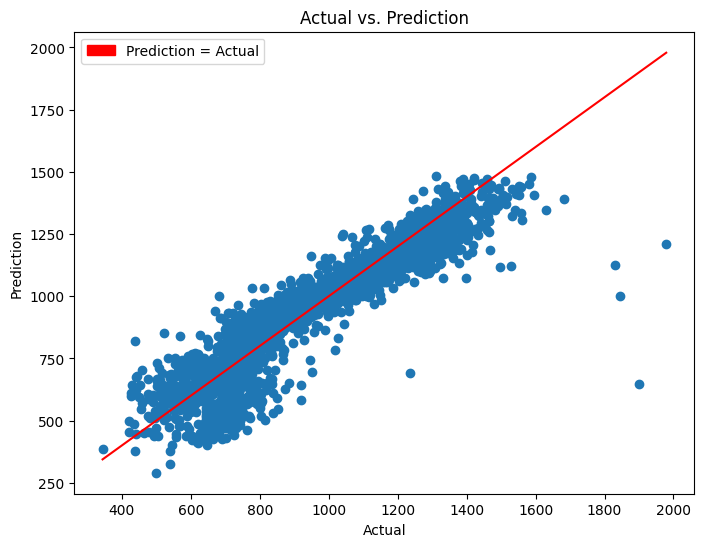

Mean Absolute Error: 85.81996308069795
Root Mean Squared Error: 114.69380820512177
R-Squared: 0.8303097919612354
Adjusted R-Squared: 0.8294330916900823


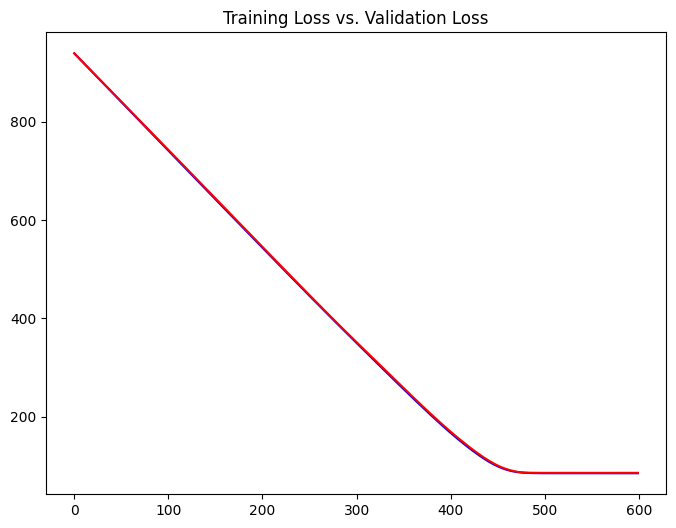

In [7]:
lm_predictions, lm_actual = get_model_predictions_and_actual(lm, lm_testset)
plot_predicted_versus_actual(lm_predictions, lm_actual)

lm_stats = evaluate_predicted_versus_actual(lm_predictions, lm_actual, 9)
print_evaluation_statistics(*lm_stats)

plot_training_versus_validation_loss(lm_train_loss, lm_valid_loss, lm_epochs)

# Test DNN Model

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


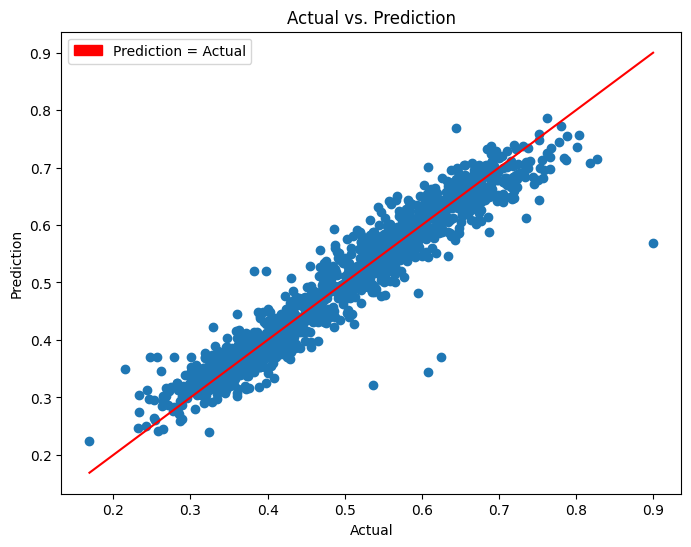

Mean Absolute Error: 0.023846349996979335
Root Mean Squared Error: 0.033537494656754964
R-Squared: 0.9352179142587062
Adjusted R-Squared: 0.9346204510173504


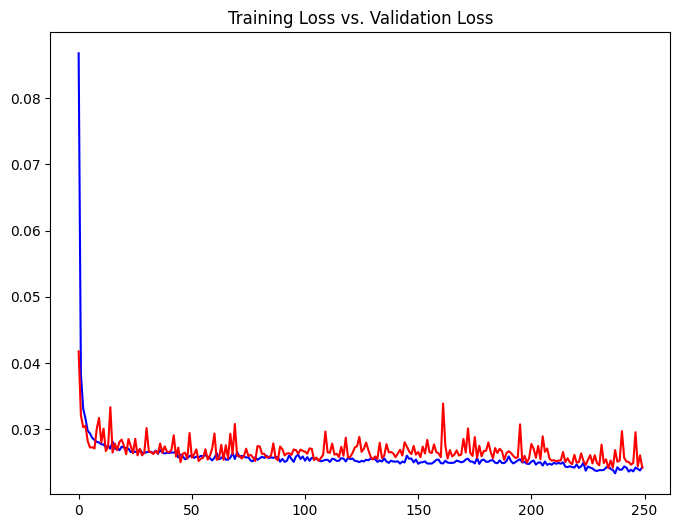

In [15]:
features = dnn_testset.copy()
dnn_actual = features.pop("reports")
dnn_predictions = dnn_model.predict(features).flatten()

dnn_stats = evaluate_predicted_versus_actual(dnn_predictions, dnn_actual, len(dnn_testset.keys()) - 1)

plot_predicted_versus_actual(dnn_predictions, dnn_actual)
print_evaluation_statistics(*dnn_stats)
plot_training_versus_validation_loss(dnn_train_loss, dnn_valid_loss, dnn_epochs)

# Compare Models

In [16]:
pd.DataFrame(
    {
        "Model" : ["Linear Regression", "Deep Neural Network"],
        "Mean Absolute Error" : [lm_stats[0] , dnn_stats[0] * max_reports],
        "Root Mean Squared Error" : [lm_stats[1] , dnn_stats[1] * max_reports],
        "R-Squared" : [lm_stats[2], dnn_stats[2]],
        "Adjusted R-Squared" : [lm_stats[3], dnn_stats[3]]
    }
)

,Model,Mean Absolute Error,Root Mean Squared Error,R-Squared,Adjusted R-Squared
0,Linear Regression,85.819963,114.693808,0.830310,0.829433
1,Deep Neural Network,48.527322,68.248802,0.935218,0.934620
